# Analyzing Portfolio Risk and Return

In this project, I'll conduct quantitative analysis on customers' retirement portfolios. I'll evaluate four new investment options for inclusion in the client portfolios. Legendary fund and hedge-fund managers run all four selections. (People sometimes refer to these managers as **whales**, because of the large amount of money that they manage). I’ll then determine the fund with the most investment potential based on key risk-management metrics: the daily returns, standard deviations, Sharpe ratios, and betas.

## Overview:

### Import the Data
### Analyze the Performance
### Analyze the Volatility
### Analyze the Risk
### Analyze the Risk-Return Profile
#### Diversify the Portfolio

### Import the Data

#### Step 1: Import the required libraries and dependencies.

In [1]:
# Import the required libraries and dependencies
# Import Pandas library
import pandas as pd

# Import NumPy library
import numpy as np

# Import the Path module from the pathlib library
from pathlib import Path

# Import the matplotlib inline dependency
%matplotlib inline

#### Step 2: Read the `whale_navs.csv` file into a Pandas DataFrame.

In [2]:
# Import the data with Pandas by reading in the CSV file and setting the DatetimeIndex 
whale_navs_df = pd.read_csv(
                            Path('./Resources/whale_navs.csv'),
                            index_col = 'date', 
                            parse_dates=True, 
                            infer_datetime_format=True
)
# Review the first 5 rows of the DataFrame
whale_navs_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500
date,,,,,
2014-10-01,31.950240,14.991826,59.977830,51.948712,194.35
2014-10-02,31.936110,14.994072,59.978626,51.957619,194.38
2014-10-03,31.969707,14.999596,60.002264,52.022484,196.52
2014-10-06,32.048215,14.999471,60.006244,52.036387,196.29
2014-10-07,31.964216,14.994720,59.993735,52.005864,193.26


#### Step 3: Use the Pandas `pct_change` function together with `dropna` to create the daily returns DataFrame. Base this DataFrame on the NAV prices of the four portfolios and on the closing price of the S&P 500 Index. Review the first five rows of the daily returns DataFrame.

In [3]:
# Prepare for the analysis by converting the dataframe of NAVs and prices to daily returns
# Drop any rows with all missing values
whale_navs_daily_returns = whale_navs_df.pct_change().dropna()
# Review the first five rows of the daily returns DataFrame.
whale_navs_daily_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500
date,,,,,
2014-10-02,-0.000442,0.000150,0.000013,0.000171,0.000154
2014-10-03,0.001052,0.000368,0.000394,0.001248,0.011009
2014-10-06,0.002456,-0.000008,0.000066,0.000267,-0.001170
2014-10-07,-0.002621,-0.000317,-0.000208,-0.000587,-0.015436
2014-10-08,0.000390,0.000369,0.000242,0.000842,0.017489


---

## Quantitative Analysis

The analysis has several components: performance, volatility, risk, risk-return profile, and portfolio diversification. You’ll analyze each component one at a time.

###  Analyze the Performance

Analyze the data to determine if any of the portfolios outperform the broader stock market, which the S&P 500 represents.

#### Step 1:  Use the default Pandas `plot` function to visualize the daily return data of the four fund portfolios and the S&P 500.

<AxesSubplot:title={'center':'Daily Returns of Whale Navs and S&P 500'}, xlabel='date'>

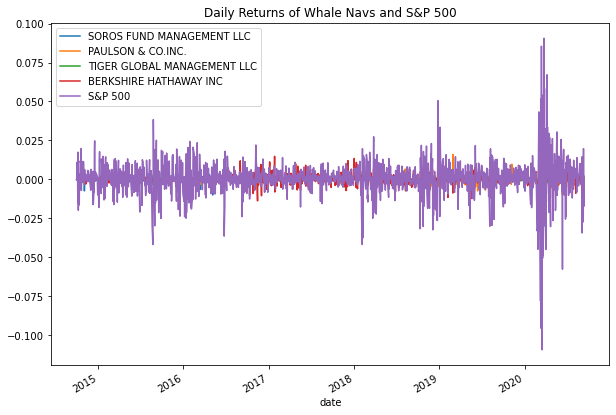

In [4]:
# Plot the daily return data of the 4 funds and the S&P 500 
# Title parameter included and the figure size adjusted
whale_navs_daily_returns.plot(figsize=(10,7), title='Daily Returns of Whale Navs and S&P 500')


#### Step 2: Use the Pandas `cumprod` function to calculate the cumulative returns for the four fund portfolios and the S&P 500. Review the last five rows of the cumulative returns DataFrame by using the Pandas `tail` function.

In [5]:
# Calculate and plot the cumulative returns of the 4 fund portfolios and the S&P 500
whale_navs_cumulative_returns = (1 + whale_navs_daily_returns).cumprod()
# Review the last 5 rows of the cumulative returns DataFrame
whale_navs_cumulative_returns.tail()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500
date,,,,,
2020-09-04,0.987355,0.958187,1.055714,1.244856,1.762645
2020-09-08,0.985640,0.956378,1.054373,1.238608,1.714484
2020-09-09,0.986739,0.958409,1.057221,1.240858,1.748341
2020-09-10,0.985498,0.959740,1.055539,1.237883,1.717983
2020-09-11,0.985086,0.957887,1.055081,1.236625,1.718858


#### Step 3: Use the default Pandas `plot` to visualize the cumulative return values for the four funds and the S&P 500 over time.

<AxesSubplot:title={'center':'Cumulative Returns of Whale Navs and S&P 500'}, xlabel='date'>

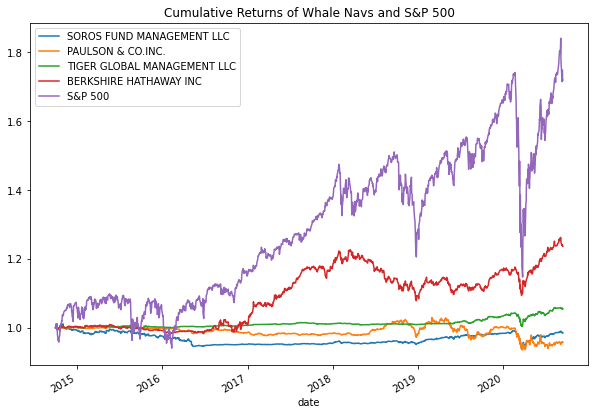

In [6]:
# Visualize the cumulative returns using the Pandas plot function
# Title parameter included and the figure size adjusted
whale_navs_cumulative_returns.plot(figsize=(10,7),title='Cumulative Returns of Whale Navs and S&P 500')


#### Insights:

Both in the dataframe and the plotted graph, there's no single fund outperforms S&P 500.

---

### Analyze the Volatility

Analyze the volatility of each of the four fund portfolios and of the S&P 500 Index by using box plots.

#### Step 1: Use the Pandas `plot` function and the `kind="box"` parameter to visualize the daily return data for each of the four portfolios and for the S&P 500 in a box plot.

<AxesSubplot:title={'center':'Daily Returns of Whale Navs and S&P 500'}>

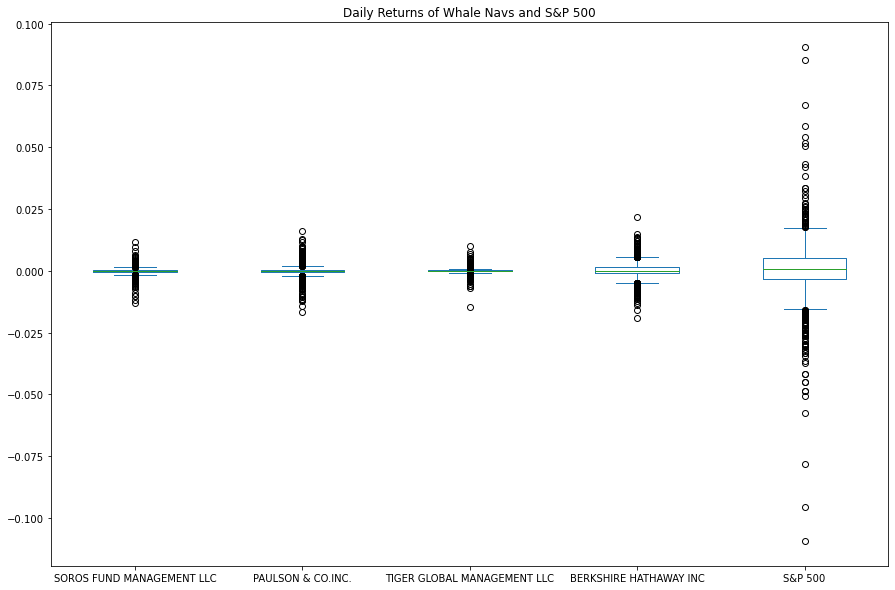

In [7]:
# Use the daily return data to create box plots to visualize the volatility of the 4 funds and the S&P 500 
# Title parameter included and the figure size adjusted
whale_navs_daily_returns.plot(kind='box',figsize=(15,10), title='Daily Returns of Whale Navs and S&P 500')


#### Step 2: Use the Pandas `drop` function to create a new DataFrame that contains the data for just the four fund portfolios by dropping the S&P 500 column. Visualize the daily return data for just the four fund portfolios by using another box plot.

/Users/yjun_ln/opt/anaconda3/envs/dev/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


<AxesSubplot:title={'center':'Daily Returns of Four Whale Navs'}>

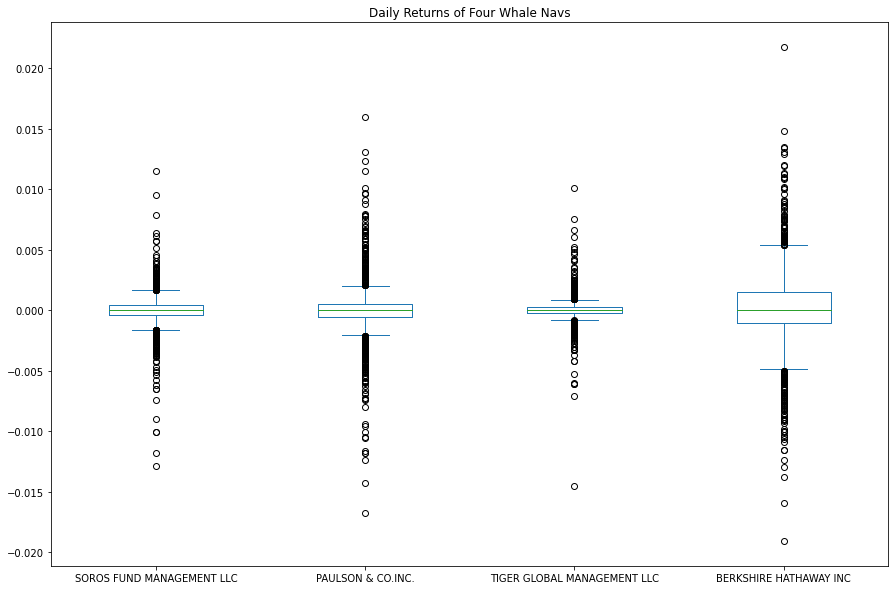

In [8]:
# Create a new DataFrame containing only the 4 fund portfolios by dropping the S&P 500 column from the DataFrame
four_funds_daily_returns = whale_navs_daily_returns.drop('S&P 500', 1)
# Create box plots to reflect the return data for only the 4 fund portfolios
# Title parameter included and the figure size adjusted
four_funds_daily_returns.plot(kind = 'box', figsize=(15,10), title='Daily Returns of Four Whale Navs')


#### Insights:

According to the box plot of the four funds daily return, Berkshire Hathway Inc has the widest spread and is most volatile; while Tiger Global Management LLC has the smallest spread and is the least volatile.

---

### Analyze the Risk

Evaluate the risk profile of each portfolio by using the standard deviation and the beta.

#### Step 1: Use the Pandas `std` function to calculate the standard deviation for each of the four portfolios and for the S&P 500. Review the standard deviation calculations, sorted from smallest to largest.

In [9]:
# Calculate the standard deviation for all 4 portfolios and the S&P 500
whale_navs_std = whale_navs_daily_returns.std()
# Review the standard deviations sorted smallest to largest
whale_navs_std.sort_values()

TIGER GLOBAL MANAGEMENT LLC    0.000996
SOROS FUND MANAGEMENT LLC      0.001405
PAULSON & CO.INC.              0.002199
BERKSHIRE HATHAWAY INC         0.003256
S&P 500                        0.011550
dtype: float64

#### Step 2: Calculate the annualized standard deviation for each of the four portfolios and for the S&P 500. To do that, multiply the standard deviation by the square root of the number of trading days (252 days).

In [10]:
# Calculate the annualized standard deviation of the 4 portfolios and the S&P 500
# Use 252 trading days
year_trading_days = 252
whale_navs_annualized_std = whale_navs_std * np.sqrt(year_trading_days)
# Review the annual standard deviations smallest to largest
whale_navs_annualized_std.sort_values()

TIGER GLOBAL MANAGEMENT LLC    0.015804
SOROS FUND MANAGEMENT LLC      0.022297
PAULSON & CO.INC.              0.034912
BERKSHIRE HATHAWAY INC         0.051692
S&P 500                        0.183345
dtype: float64

#### Step 3: Use the daily returns DataFrame and a 21-day rolling window to plot the rolling standard deviations of the four fund portfolios and of the S&P 500 index.

<AxesSubplot:title={'center':'21-Day Rolling Standard Diviation of Whale Navs nad S&P 500'}, xlabel='date'>

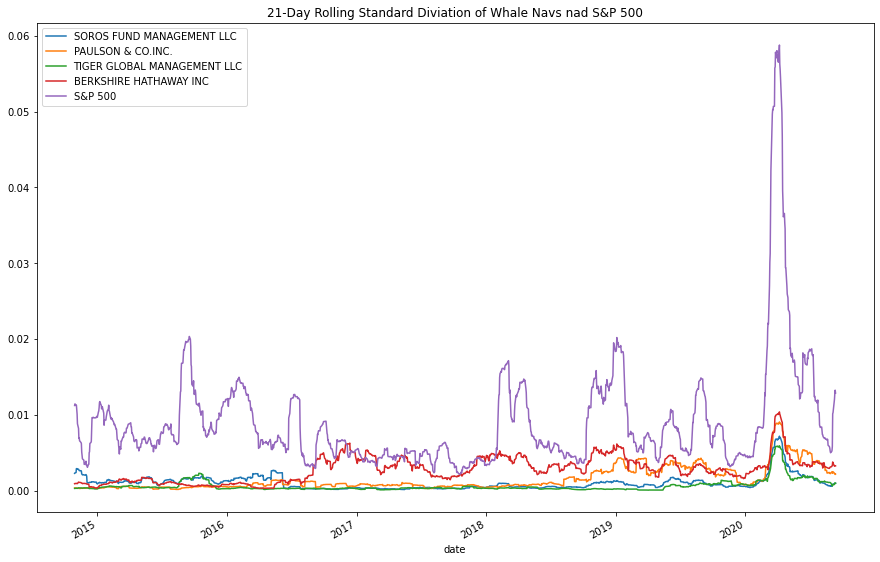

In [11]:
# Using the daily returns DataFrame and a 21-day rolling window to calculate whale nav 21 day rolling standard diviation
whale_nav_21_rolling_std = whale_navs_daily_returns.rolling(window=21).std()
# plot the rolling standard deviation of the 4 portfolios and the S&P 500
# Title parameter included and the figure size adjusted
whale_nav_21_rolling_std.plot(
                            figsize=(15,10), 
                            title='21-Day Rolling Standard Diviation of Whale Navs nad S&P 500'
)

#### Step 4: Use the daily returns DataFrame and a 21-day rolling window to plot the rolling standard deviations of only the four fund portfolios.

<AxesSubplot:title={'center':'21-Day Rolling Standard Diviation of Four Whale Navs'}, xlabel='date'>

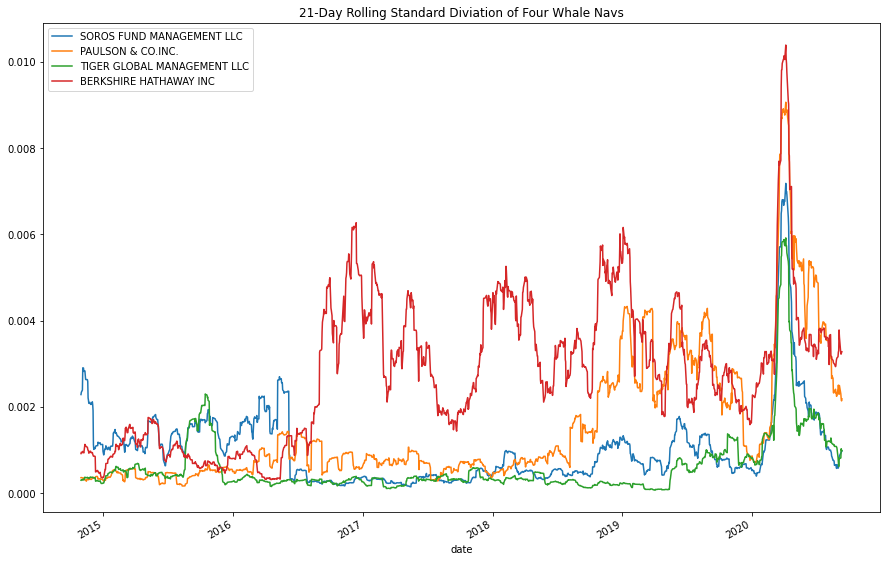

In [12]:
# Using the daily return data and a 21-day rolling window, plot the rolling standard deviation of just the 4 portfolios. 
# Title parameter included and the figure size adjusted
four_funds_21_rolling_std = four_funds_daily_returns.rolling(window=21).std()
four_funds_21_rolling_std.plot(
                            figsize=(15,10), 
                            title='21-Day Rolling Standard Diviation of Four Whale Navs'
)

#### Insights:

From the calculation and sort result: S&P 500 has the highest risk with 0.1834 annualized standard diviation. Not single one portfolio pose more risk than S&P 500.

According to the rolling metrics, before late 2016, Berkshire Hathway Inc's portfolio did not react the same way as the risk of the S&P 500 increases. However, starting late 2016, the risk of Berkshire Hathway Inc's portfolio increases corresponded to that of the S&P 500.

Before late 2018, Paulson & Co's portfolio did not follow the risk trend of S&P 500. While starting late 2018, the risk of Paulson & Co's portfolio increases at the same time that the risk of risk of the S&P 500 increases.

Soros Fund Management and Tiger Global Management's portfolios did not join the risk trend of S&P 500 until late 2018 and mid 2019 respectively.

Before mid 2016, all four portfolios had little reactions to the increasing risk of the S&P 500. However, in the early 2020, all four portfolios showed an increasing risk corresponded to the risk surge of the S&P 500.


According to the rolling standard deviation of only the four fund portfolios, starting mid 2016 Berkshier Hathway appears to pose the most risk, followed by Pauson & Co. Before mid 2016, Soros Fund Management and Berkshier Hathway pose to more risk. Yet, Tiger Global Management had leading risk in late 2015.

---

### Analyze the Risk-Return Profile

To determine the overall risk of an asset or portfolio, quantitative analysts and investment managers consider not only its risk metrics but also its risk-return profile. After all, if you have two portfolios that each offer a 10% return but one has less risk, you’d probably invest in the smaller-risk portfolio. For this reason, you need to consider the Sharpe ratios for each portfolio.

#### Step 1: Use the daily return DataFrame to calculate the annualized average return data for the four fund portfolios and for the S&P 500.

In [13]:
# Calculate the annual average return data for the four fund portfolios and the S&P 500
# Use 252 as the number of trading days in the year
year_trading_days = 252
whale_navs_annual_average_return = whale_navs_daily_returns.mean() * year_trading_days
# Review the annual average returns sorted from lowest to highest
whale_navs_annual_average_return.sort_values()

PAULSON & CO.INC.             -0.006633
SOROS FUND MANAGEMENT LLC     -0.002281
TIGER GLOBAL MANAGEMENT LLC    0.009151
BERKSHIRE HATHAWAY INC         0.037090
S&P 500                        0.108102
dtype: float64

#### Step 2: Calculate the Sharpe ratios for the four fund portfolios and for the S&P 500.

In [14]:
# Calculate the annualized Sharpe Ratios for each of the 4 portfolios and the S&P 500.
whale_navs_sharpe_ratio = whale_navs_annual_average_return / whale_navs_annualized_std
# Review the Sharpe ratios sorted lowest to highest
whale_navs_sharpe_ratio.sort_values()

PAULSON & CO.INC.             -0.189998
SOROS FUND MANAGEMENT LLC     -0.102290
TIGER GLOBAL MANAGEMENT LLC    0.579002
S&P 500                        0.589612
BERKSHIRE HATHAWAY INC         0.717512
dtype: float64

#### Step 3: Visualize the Sharpe ratios for the four funds and for the S&P 500 in a bar chart.

<AxesSubplot:title={'center':'Sharpe Ratios of Whale Navs and S&P 500'}>

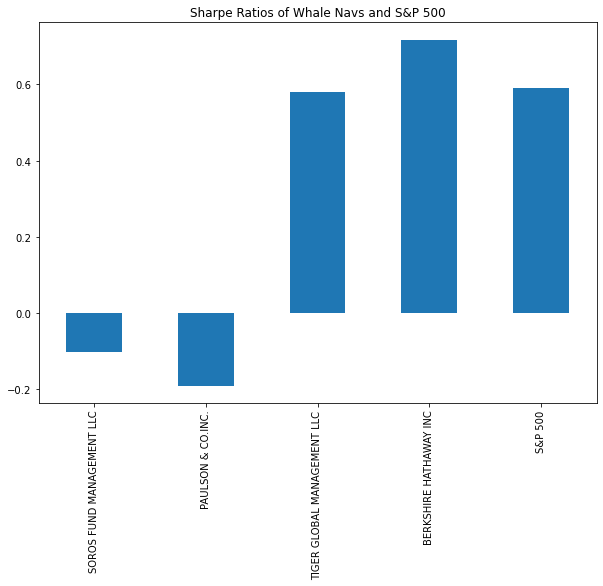

In [15]:
# Visualize the Sharpe ratios as a bar chart
# Title parameter included and the figure size adjusted
whale_navs_sharpe_ratio.plot.bar(figsize=(10,7), title='Sharpe Ratios of Whale Navs and S&P 500')


#### Insights:

From the Sharpe ratio Berkshire Hathway offers the best risk_return profile with 0.717512, while Paulson & Co offers the worst with -0.189998 and and the bar chart confirms.

---

### Diversify the Portfolio

#### Use the Pandas `var` function to calculate the variance of the S&P 500 by using a 60-day rolling window. Visualize the last five rows of the variance of the S&P 500.

In [16]:
# Calculate the variance of the S&P 500 using a rolling 60-day window.
snp_rolling_60_variance = whale_navs_daily_returns['S&P 500'].rolling(window=60).var()

##### Portfolio 1 - Step 1: Using the 60-day rolling window, the daily return data, and the S&P 500 returns, calculate the covariance. Review the last five rows of the covariance of the portfolio.

In [17]:
# Calculate the covariance of Berkshier Hathaway using a 60-day rolling window 
berk_rolling_60_covariance = whale_navs_daily_returns['BERKSHIRE HATHAWAY INC'].rolling(window=60).cov(
                            whale_navs_daily_returns['S&P 500'])
# Review the last five rows of the covariance data
berk_rolling_60_covariance.tail()

date
2020-09-04    0.000021
2020-09-08    0.000023
2020-09-09    0.000024
2020-09-10    0.000024
2020-09-11    0.000024
dtype: float64

##### Portfolio 1 - Step 2: Calculate the beta of the portfolio.

In [18]:
# Calculate the beta of Berkshier Hathaway based on the 60-day rolling covariance compared to the market (S&P 500)
berk_rolling_60_beta = berk_rolling_60_covariance / snp_rolling_60_variance
# Review the last five rows of the beta information
berk_rolling_60_beta.tail()

date
2020-09-04    0.207879
2020-09-08    0.203051
2020-09-09    0.196632
2020-09-10    0.197543
2020-09-11    0.199411
dtype: float64

##### Portfolio 1 - Step 3: Use the Pandas `mean` function to calculate the average value of the 60-day rolling beta of the portfolio.

In [19]:
# Calculate the average of the 60-day rolling beta of Berkshier Hathaway
berk_average_rolling_60_beta = berk_rolling_60_beta.mean()
# Display the result
berk_average_rolling_60_beta

0.2214986101354593

##### Portfolio 1 - Step 4: Plot the 60-day rolling beta.

<AxesSubplot:title={'center':'Berkshier Hathaway 60 Day Rolling Beta'}, xlabel='date'>

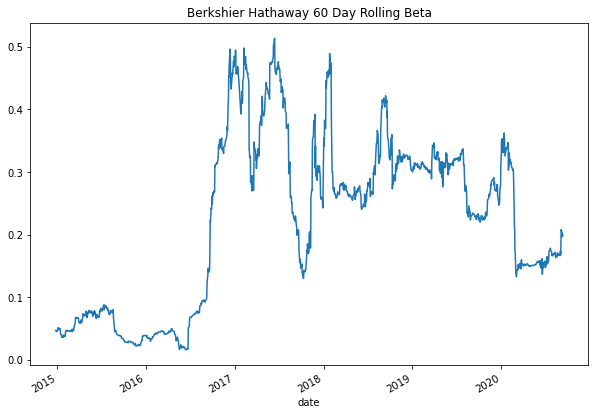

In [20]:
# Plot the rolling beta of Berkshier Hathaway with title parameter and adjust the figure size
berk_rolling_60_beta.plot(figsize=(10,7),title='Berkshier Hathaway 60 Day Rolling Beta')


##### Portfolio 2 - Step 1: Using the 60-day rolling window, the daily return data, and the S&P 500 returns, calculate the covariance. Review the last five rows of the covariance of the portfolio.

In [21]:
# Calculate the covariance of Tiger Global using a 60-day rolling window 
tiger_rolling_60_covariance = whale_navs_daily_returns['TIGER GLOBAL MANAGEMENT LLC'].rolling(window=60).cov(
                            whale_navs_daily_returns['S&P 500'])
# Review the last five rows of the covariance data
tiger_rolling_60_covariance.tail()

date
2020-09-04    0.000008
2020-09-08    0.000009
2020-09-09    0.000010
2020-09-10    0.000010
2020-09-11    0.000010
dtype: float64

##### Portfolio 2 - Step 2: Calculate the beta of the portfolio.

In [22]:
# Calculate the beta of Tiger Global based on the 60-day rolling covariance compared to the market (S&P 500)
tiger_rolling_60_beta = tiger_rolling_60_covariance / snp_rolling_60_variance
# Review the last five rows of the beta information
tiger_rolling_60_beta.tail()

date
2020-09-04    0.081061
2020-09-08    0.076672
2020-09-09    0.079575
2020-09-10    0.080934
2020-09-11    0.081378
dtype: float64

##### Portfolio 2 - Step 3: Use the Pandas `mean` function to calculate the average value of the 60-day rolling beta of the portfolio.

In [23]:
# Calculate the average of the Tiger Global 60-day rolling beta
tiger_average_rolling_60_beta = tiger_rolling_60_beta.mean()
# Display the result
tiger_average_rolling_60_beta

0.03093001487238774

##### Portfolio 2 - Step 4: Plot the 60-day rolling beta.

<AxesSubplot:title={'center':'Tiger Global Management 60 Day Rolling Beta'}, xlabel='date'>

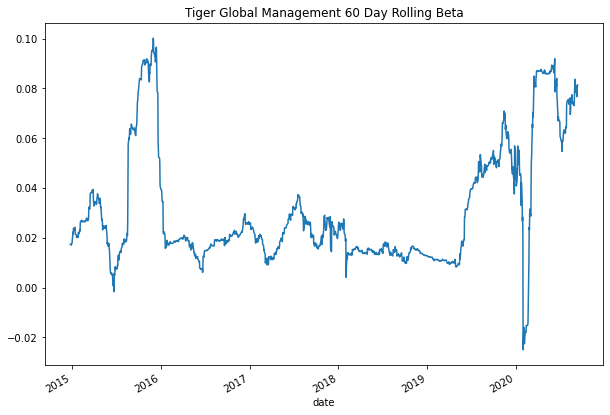

In [24]:
# Plot the rolling beta of Tiger Global include a title parameter and adjust the figure size
tiger_rolling_60_beta.plot(figsize=(10,7),title='Tiger Global Management 60 Day Rolling Beta')


#### Insights:

Berkshier Hathaway and Tiger Global Management both have positive covariance, which means that both portfolios' risk moves in the same direction as the market's risk. Between the two, Berkshier Hathaway's portfolio has larger covariance, so it seems more sensitive to movements in the S&P 500. Berkshier Hathaway's beta is larger (average rolling beta = 0.2214986101354593) than Tiger Global (average rolling beta = 0.03093001487238774) and also closer to 1.0 (market's return value).


The additional calculation and visualization shows all 4 portfolios' rolling 60 day beta. We can see that Berkshier Hathaway has the closest to 1 beta, and overall, Berkshier Hathaway has the highest risk return ratio (Sharpe ratio), highest cumulative returns, despite its relatively high volatility and relatively high standard diviation. Thus, Berkshier Hathaway is my first choice.

In the visualization of rolling 60 day beta of four portfolios below, Paulson & Co has the second to highest 60 day rolling beta. However, overall, Tiger Global has higher cumulative returns, it has the second highest risk return ratio, the smallest volatility and smallest standard diviation. So, Tiger Global Management is my second choice.

In [25]:
# Calculate the covariance of Soros Fund using a 60-day rolling window 
soros_rolling_60_covariance = whale_navs_daily_returns['SOROS FUND MANAGEMENT LLC'].rolling(window=60).cov(
                            whale_navs_daily_returns['S&P 500'])
# Calculate the rolling beta of Soros Fund using a 60-day rolling window
soros_rolling_60_beta = soros_rolling_60_covariance / snp_rolling_60_variance

# Calculate the covariance of Paulson & Co using a 60-day rolling window 
pnc_rolling_60_covariance = whale_navs_daily_returns['PAULSON & CO.INC.'].rolling(window=60).cov(
                            whale_navs_daily_returns['S&P 500'])
# Calculate the rolling beta of Paulson & Co using a 60-day rolling window
pnc_rolling_60_beta = pnc_rolling_60_covariance / snp_rolling_60_variance

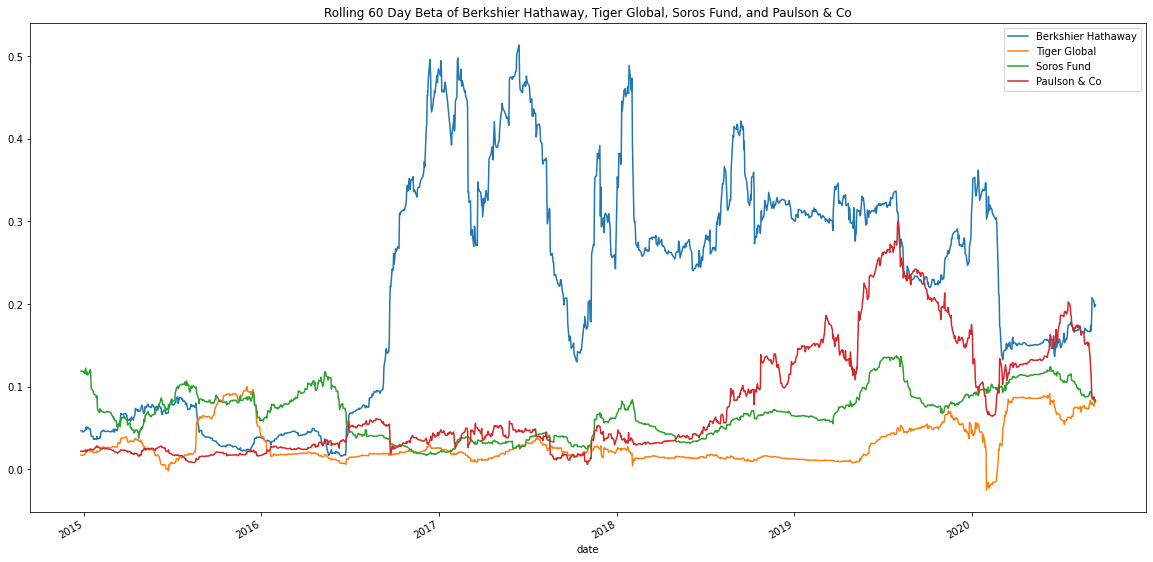

In [26]:
# Using the Pandas plot function, create a plot that visualizes the 60-day rolling beta for all four portfolios
# Title included and figure size adjusted
ax = berk_rolling_60_beta.plot(
    figsize=(20,10),
    title='Rolling 60 Day Beta of Berkshier Hathaway, Tiger Global, Soros Fund, and Paulson & Co'
)

# Overlay the plots for the four portfolios 60-day rolling beta
tiger_rolling_60_beta.plot(ax=ax)
soros_rolling_60_beta.plot(ax=ax)
pnc_rolling_60_beta.plot(ax=ax)

# Set the legend for the visualization
ax.legend(['Berkshier Hathaway', 'Tiger Global', 'Soros Fund', 'Paulson & Co'])

---